In [1]:
# # # # INSTALLING AND IMPORTING THE LIBRARIES # # # #

# Importing the General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud

# Importing the libraries used for Training and Testing Model for Sentiment Analysis
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [2]:
# Loading the Dataset
df = pd.read_csv("preprocessed_df.csv")
df

,Unnamed: 0,sentiment,preprocess
0,0,empty,know listenin bad habit earlier start freakin ...
1,1,sadness,layin bed headach ughhhh waitin call
2,2,sadness,funer ceremoni gloomi friday
3,3,enthusiasm,want hang friend soon
4,4,neutral,trade someon houston ticket
...,...,...,...
39995,39995,neutral,NaN
39996,39996,love,happi mother day love
39997,39997,love,happi mother day mommi woman long momma someon...
39998,39998,happiness,wassup beauti follow peep new hit singl def video


In [3]:
# Bifurgating the sentiments as POSITIVE, NEGATIVE and NEUTRAL 
pos_sentiment = ['relief', 'fun', 'surprise', 'love', 'enthusiasm', 'happiness']
neg_sentiment = ['worry', 'sadness', 'boredom', 'anger', 'hate']
                        
# Modifying the dataframe by adding a Series of sentiment_type    
# -1 -> Negative sentiment
#  1 -> Positive sentiment
#  0 -> Neutral sentiment
def func_split(x):
    if x in pos_sentiment:
        return +1
    elif x in neg_sentiment:
        return -1
    else:
        return 0
df['sentiment_type'] = df['sentiment'].apply(func_split)

In [4]:
# Split dataframe as positive, neutral and negative dataframe:
positive = df[df['sentiment_type'] == 1]
negative = df[df['sentiment_type'] == -1]
neutral = df[df['sentiment_type'] == 0]

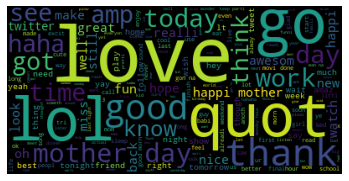

In [5]:
pos_words = " ".join(set([str(i) for i in positive['preprocess']]))
wordcloud2 = WordCloud().generate(pos_words)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

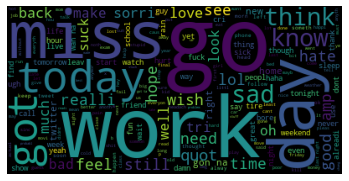

In [6]:
neg_words = " ".join(set([str(i) for i in negative['preprocess']]))
wordcloud3 = WordCloud().generate(neg_words)
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

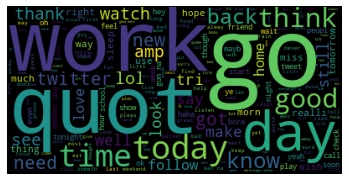

In [7]:
neu_words = " ".join(set([str(i) for i in neutral['preprocess']]))
wordcloud4 = WordCloud().generate(neu_words)
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

## Splitting The Dataset 

In [8]:
# Splitting the dataset into Train and Test Dataset
# 80% ---> Training Dataset    20% ---> Validation Dataset


# Keep 1000 samples of the data as test set
test_set = df[:1000]

# Get training and validation data
X_train, X_val, y_train, y_val = train_test_split(df['preprocess'][1000:], 
                                                  df['sentiment_type'][1000:], 
                                                  test_size=0.2, 
                                                  random_state=48)

# Get sentiment labels for test set
y_test = test_set['sentiment_type']
X_test = test_set['preprocess']

## Creating a Bag Of words

In [9]:
# Vectorize text reviews to numbers
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train.astype(str))
X_test = vec.transform(X_test.astype(str))
X_val = vec.transform(X_val.astype(str))

## Gradient Boosting Classifier Model

In [11]:
# # # # Training the Model # # # # 
gbm = GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=48)
gbm.fit(X_train, y_train)

# # # # Predicting Sentiment of Test Dataset # # # # 
predicted = gbm.predict(X_test)

# # # # Evaluting The Model # # # #

'''Accuracy classification score : This function computes subset accuracy. 
   The set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
'''
score = accuracy_score(y_test, predicted)
print("Accuracy =",int(score*100),"%")

'''classification_report : Builds a text report showing the main classification metrics.'''
classificationReport = classification_report(y_test, predicted)
print(classificationReport)

Accuracy = 60
              precision    recall  f1-score   support

          -1       0.67      0.83      0.74       597
           0       0.57      0.17      0.26       256
           1       0.33      0.42      0.37       147

    accuracy                           0.60      1000
   macro avg       0.52      0.47      0.46      1000
weighted avg       0.60      0.60      0.56      1000



## Logistic Regression Model

In [13]:
# # # # Training the Model # # # # 
model=LogisticRegression()
model.fit(X_train,y_train)

# # # # Predicting Sentiment of Test Dataset # # # # 
y_predict = model.predict(X_test)

# # # # Evaluting The Model # # # #
score = accuracy_score(y_test, y_predict)
print("Accuracy =",int(score*100),"%")

classificationReport = classification_report(y_test, predicted)
print(classificationReport)

Accuracy = 58 %
              precision    recall  f1-score   support

          -1       0.67      0.83      0.74       597
           0       0.57      0.17      0.26       256
           1       0.33      0.42      0.37       147

    accuracy                           0.60      1000
   macro avg       0.52      0.47      0.46      1000
weighted avg       0.60      0.60      0.56      1000

